# 2022_08_26_mtt6_set1-3_MgTitra_KU_seq analysis

## metadata
- project: 
- constructs: 
- experiments: 
- sequencing-runs: 

## setup notebook

In [1]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

In [2]:
# custom code imports

In [3]:
# general figure tweaks
%matplotlib inline
plt.rcParams["figure.figsize"] = (15, 10)
plt.rcParams["font.size"] = 16
# to fight the theme
plt.rcParams["figure.facecolor"] = "white"

In [4]:
def r2(x, y):
    return round(stats.pearsonr(x, y)[0] ** 2, 3)


def plot_reg_with_r2(x, y, data):
    sns.regplot(x=x, y=y, data=data, line_kws={"label": r2(data[x], data[y])})
    plt.legend();

## load data

In [5]:
dropbox_path = "/Users/jyesselm/Dropbox"
runs = [
    "2022_08_25_mtt6_set4_1st3_seq",
    "2022_08_26_mtt6_set4_2nd3_seq",
    "2022_08_29_mtt6_seq",
    "2022_09_01_mtt6_set4_seq",
    "2022_08_31_mtt6_set4_seq",
    "2022_08_26_mtt6_set1-3_MgTitra_KU_seq",
]
path = f"{dropbox_path}/data/sequencing_analysis/summary/"
dfs = []
for run in runs:
    df = pd.read_json(f"{path}{run}.json")
    dfs.append(df)
df = pd.concat(dfs)

In [6]:
df_ref = pd.read_csv(
    f"{dropbox_path}/projects/other/2022_01_27_steve_ttrs/data/all_sets.csv"
)
df_ref = df_ref[["r_seq", "r_name", "dg_gaaa", "set"]]
df_ref.rename({"r_seq": "name", "dg_gaaa": "dg"}, axis=1, inplace=True)

In [7]:
df_sub = df.merge(df_ref, on="name")
df_sub = df_sub[~df_sub["name"].isin(["UAUGG_CUUAAC"])]
df_sub["ln_gaaa_avg"] = np.log(df_sub["gaaa_avg"])

### print out metadata

In [8]:
# print out stats about the data that I want to include in metadata
cols = "code,exp_name,run_name".split(",")
for c in cols:
    print(f"{c}: {' '.join(np.array(df[c].unique()))}\n")

code: C0086 C0083 C0084 C0085

exp_name: mtt6_mutations_set_4_50mM-NaC_1.5-mM-Mg2+ 2022_08_12_C0083_50mM_NaC_Mg_titra_CM 2022_08_19_C0086_50mM_NaC_Mg_titra_CM 2022_08_16_C0084_50mM_NaC_Mg_titra_CM 2022_08_18_C0085_50mM_NaC_Mg_titra_CM

run_name: 2022_08_25_mtt6_set4_1st3_seq 2022_08_26_mtt6_set4_2nd3_seq 2022_08_29_mtt6_seq 2022_09_01_mtt6_set4_seq 2022_08_31_mtt6_set4_seq 2022_08_26_mtt6_set1-3_MgTitra_KU_seq



In [9]:
df_sub_1 = df_sub[df_sub["mg_conc"] == 5.0]

Text(0, 0.5, 'DMS reactivity dG')

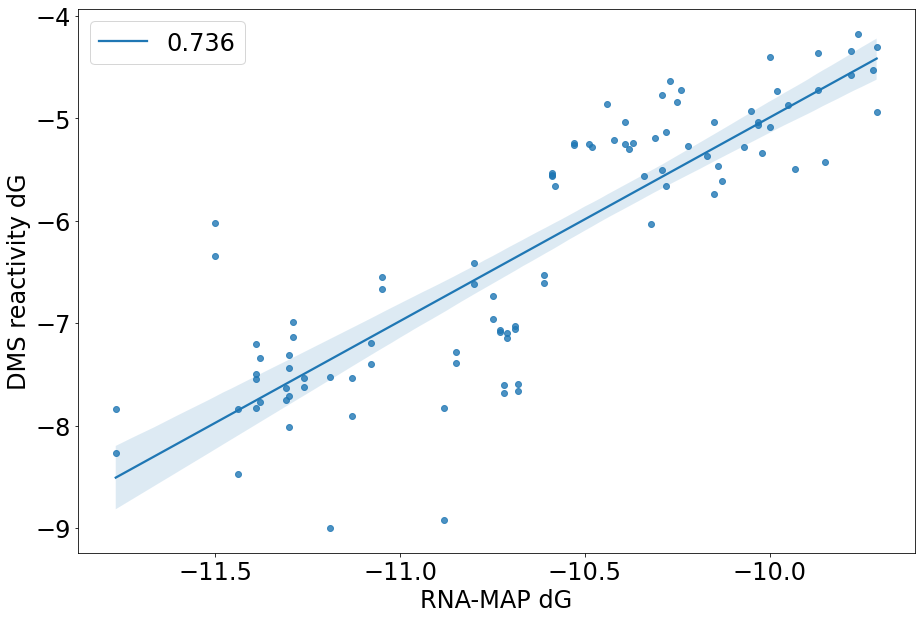

In [10]:
df_sub_1 = df_sub[df_sub["mg_conc"] == 5.0]
plt.rcParams["font.size"] = 24
plot_reg_with_r2("dg", "ln_gaaa_avg", df_sub_1)
plt.xlabel("RNA-MAP dG")
plt.ylabel("DMS reactivity dG")

In [30]:
df_mg = pd.read_csv(
    "/Users/jyesselm/Dropbox/notes/projects/q_dms_mapseq/analysis/notebooks/mg_1_2.csv"
)

In [31]:
df_mg = df_mg.merge(df_ref, on="name")
df_mg["ln_k"] = np.log(df_mg["k"])
df_mg = df_mg[~df_mg["name"].isin(["UAUGG_CUUAAC"])]

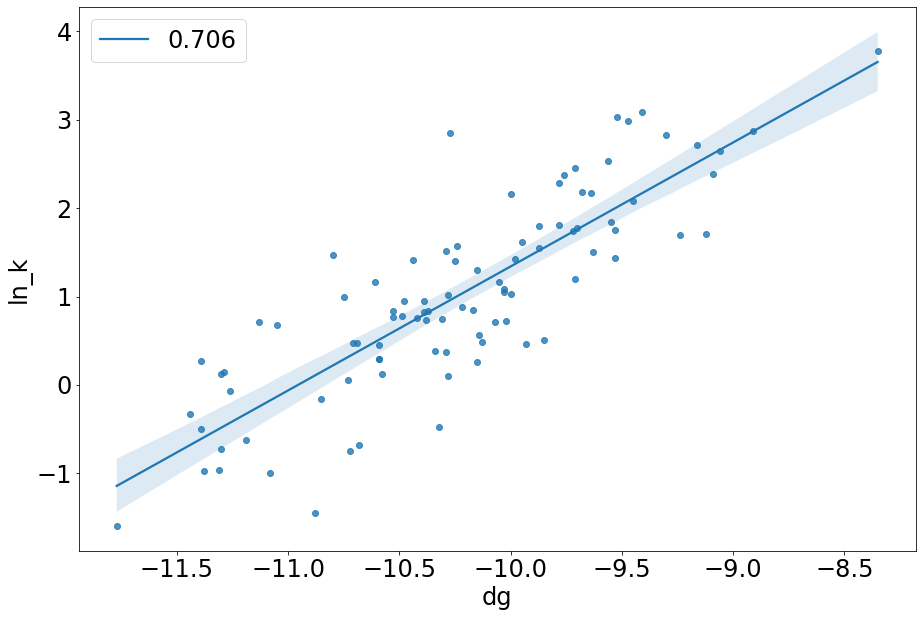

In [32]:
plot_reg_with_r2("dg", "ln_k", df_mg)

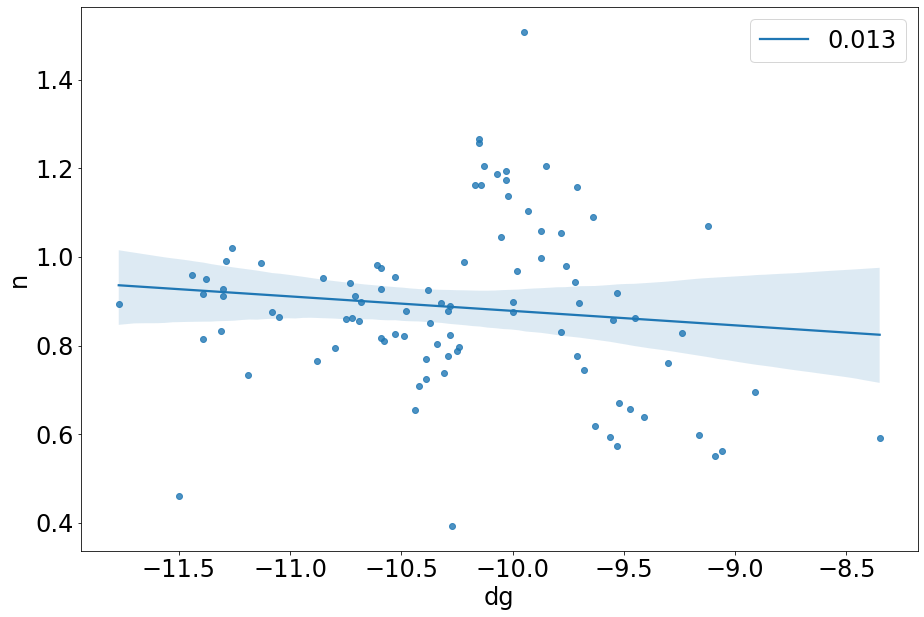

In [25]:
plot_reg_with_r2("dg", "n", df_mg)